#### Import Necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

#### Read dataset location and assign subsets to a list
#### Convert images in the datatset to an array of numbers to allow for training

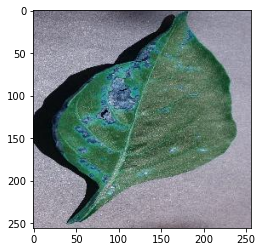

In [2]:
DATADIR = r"C:\Users\User\Documents\SIUE\fRESHMAN YEAR\FALL SEMESTER\PepperBell"
CATEGORIES = ["Pepper__bell___Bacterial_spot","Pepper__bell___healthy"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) #path to folder
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array, cmap = "gray")
        plt.show()
        break
    break
    
        

#### Print Image array to confirm conversion

In [3]:
print(img_array)

[[[ 97  94 109]
  [ 91  88 103]
  [122 119 134]
  ...
  [149 148 164]
  [154 153 169]
  [164 163 179]]

 [[126 123 138]
  [101  98 113]
  [118 115 130]
  ...
  [149 148 164]
  [148 147 163]
  [151 150 166]]

 [[135 132 147]
  [ 87  84  99]
  [142 139 154]
  ...
  [153 152 168]
  [147 146 162]
  [145 144 160]]

 ...

 [[149 142 155]
  [165 158 171]
  [211 204 217]
  ...
  [152 143 156]
  [152 143 156]
  [151 142 155]]

 [[156 149 162]
  [135 128 141]
  [143 136 149]
  ...
  [166 157 170]
  [168 159 172]
  [166 157 170]]

 [[172 165 178]
  [161 154 167]
  [190 183 196]
  ...
  [162 153 166]
  [167 158 171]
  [166 157 170]]]


#### Print shape of array to confirm if image is in black and white or coloured

In [4]:
print(img_array.shape)

(256, 256, 3)


#### Resize all images in the dataset to have the same dimensions

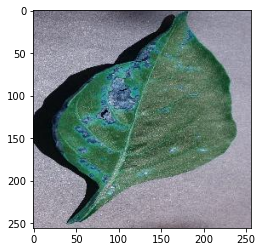

In [5]:
IMG_SIZE = 256

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = "gray")
plt.show()

#### Create training data

In [6]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) #path to folder
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()

#### View size of training data

In [7]:
print(len(training_data))

2475


#### Randomly shuffle the data

In [8]:
import random

random.shuffle(training_data)

#### Shuffling the data will mix both the images of the healthy and bacterial spot plants so as not to have a cluster of similar images thereby improving accuracy

In [9]:
for sample in training_data:
    print(sample[1])

1
0
0
0
1
1
1
0
1
0
1
1
0
1
0
1
1
0
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
0
0
0
1
1
1
0
0
1
0
1
1
1
1
1
1
0
0
0
1
1
1
1
1
0
1
1
1
0
1
1
0
1
1
1
0
1
1
0
1
1
0
0
1
1
1
0
1
1
0
0
1
1
1
1
1
1
0
0
0
1
1
1
1
0
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
0
0
1
0
0
1
1
1
1
0
0
0
1
1
0
1
1
1
0
0
0
1
1
1
1
1
0
1
1
1
0
1
1
1
0
0
0
1
1
0
1
1
1
0
0
0
1
1
0
1
1
1
1
1
0
0
0
1
1
0
1
1
1
1
0
1
1
1
0
1
1
0
0
1
1
0
0
0
1
1
0
1
1
1
1
0
1
1
0
0
1
0
1
1
0
0
0
0
0
0
1
0
1
1
0
1
1
0
1
1
0
0
0
1
0
1
1
1
1
1
0
1
1
1
1
1
0
1
0
0
0
1
1
1
0
1
1
1
0
0
0
0
1
1
1
0
0
0
1
0
1
0
1
0
0
0
1
0
0
0
0
1
0
1
1
1
0
1
0
0
0
1
1
1
0
0
0
0
0
0
1
1
0
1
0
0
0
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
1
1
0
1
1
1
0
1
0
0
1
0
1
1
1
0
0
1
1
1
1
0
1
1
0
1
1
1
1
1
1
0
0
0
0
1
1
1
1
0
1
1
0
1
0
1
0
0
0
0
0
1
1
0
1
1
0
0
0
1
0
1
1
0
1
1
1
1
1
1
0
0
1
1
1
0
1
0
1
1
0
0
1
0
1
0
0
1
1
1
0
0
1
0
1
0
0
1
1
1
1
0
0
1
0
0
0
1
0
1
1
1
1
1
0
0
0
1
1
1
1
0
1
1
0
1
0
0
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
0
1
1
0
1
1
0
0
1
0
0
1
1
0
0
0
0
1
0
1
0
1
1
1
0
1
1
1
0
0
1
0
1


#### Create model for test and train

In [10]:
X = []
y = []

#### X - test, y - train

In [11]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3 )


#### Save data

In [12]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()


In [13]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)


In [14]:
X[1]

array([[[143, 152, 166],
        [159, 168, 182],
        [164, 173, 187],
        ...,
        [119, 131, 149],
        [130, 142, 160],
        [115, 127, 145]],

       [[154, 163, 177],
        [167, 176, 190],
        [169, 178, 192],
        ...,
        [141, 153, 171],
        [121, 133, 151],
        [120, 132, 150]],

       [[150, 159, 173],
        [161, 170, 184],
        [161, 170, 184],
        ...,
        [107, 119, 137],
        [132, 144, 162],
        [126, 138, 156]],

       ...,

       [[147, 157, 174],
        [160, 170, 187],
        [155, 165, 182],
        ...,
        [137, 151, 173],
        [144, 158, 180],
        [120, 134, 156]],

       [[150, 160, 177],
        [140, 150, 167],
        [153, 163, 180],
        ...,
        [140, 154, 176],
        [131, 145, 167],
        [133, 147, 169]],

       [[136, 146, 163],
        [142, 152, 169],
        [147, 157, 174],
        ...,
        [126, 140, 162],
        [141, 155, 177],
        [131, 145, 167]]

#### Now that we've got out dataset, we're ready to cover convolutional neural networks and implement one with our data for classification.